In [2]:
import pandas as pd
import gensim
import time
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [5]:
with open('Data/Germany_stemmed.txt') as file:
    lines = file.readlines()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
lines[0]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'great place visit great visit histor build unfortun could get reserv visit glass dome parliament build pleas book well advanc\n'

In [7]:
len(lines)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


27827

## Tokenize

In [8]:
list(gensim.utils.tokenize(lines[0], deacc = True))

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['great',
 'place',
 'visit',
 'great',
 'visit',
 'histor',
 'build',
 'unfortun',
 'could',
 'get',
 'reserv',
 'visit',
 'glass',
 'dome',
 'parliament',
 'build',
 'pleas',
 'book',
 'well',
 'advanc']

In [9]:
corpus = [list(gensim.utils.tokenize(line, deacc = True)) for line in lines]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
corpus = pd.DataFrame({'reviews': corpus})
corpus.head()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


reviews
0  [great, place, visit, great, visit, histor, bu...
1  [histori, nerd, stop, polit, center, germani, ...
2  [famou, reichstag, admir, outsid, gave, us, id...
3  [must, tour, berlin, build, import, much, hist...
4  [plan, ahead, found, place, berlin, advanc, re...

In [11]:
docs = corpus['reviews']

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Bag of words

In [12]:
dictionary = gensim.corpora.Dictionary(docs)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
count=0
for k,v in dictionary.iteritems():
    print(k,v)
    count+=1
    if count>20:
        break

0 advanc
1 book
2 build
3 could
4 dome
5 get
6 glass
7 great
8 histor
9 parliament
10 place
11 pleas
12 reserv
13 unfortun
14 visit
15 well
16 architectur
17 berlin
18 center
19 germani
20 histori


/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
bow = [dictionary.doc2bow(doc) for doc in docs]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
start = time.time()
lda_model = gensim.models.LdaModel(bow,
                                    num_topics=50,
                                    id2word=dictionary,
                                    passes=2)
end = time.time()
print("Processing time: %fs" % (end - start))

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing time: 46.787880s


In [16]:
for idx,topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.075*"well" + 0.035*"maintain" + 0.035*"fabul" + 0.027*"shoe" + 0.025*"worth" + 0.023*"comfort" + 0.023*"wear" + 0.017*"interior" + 0.015*"visit" + 0.014*"thought"


Topic: 1 
Words: 0.081*"organ" + 0.070*"music" + 0.067*"nuremberg" + 0.049*"concert" + 0.039*"play" + 0.035*"magic" + 0.031*"wine" + 0.023*"sound" + 0.022*"man" + 0.018*"listen"


Topic: 2 
Words: 0.121*"day" + 0.036*"recommend" + 0.035*"trip" + 0.034*"weather" + 0.028*"visit" + 0.024*"cold" + 0.023*"highli" + 0.014*"hot" + 0.014*"munich" + 0.014*"warm"


Topic: 3 
Words: 0.026*"memori" + 0.016*"origin" + 0.015*"war" + 0.015*"visit" + 0.014*"one" + 0.014*"german" + 0.013*"ship" + 0.012*"rebuilt" + 0.009*"world" + 0.008*"first"


Topic: 4 
Words: 0.032*"german" + 0.016*"read" + 0.016*"speak" + 0.015*"english" + 0.014*"inform" + 0.014*"histori" + 0.013*"visit" + 0.011*"time" + 0.010*"understand" + 0.009*"live"


Topic: 5 
Words: 0.038*"hotel" + 0.019*"stay" + 0.013*"queue" + 0.013*"stand" + 0.012*"experi" +

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
pyLDAvis.enable_notebook()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
gensimvis.prepare(lda_model, bow, dictionary)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
24     0.092606  0.147228       1        1  6.489616
13     0.078138  0.167251       2        1  4.725531
19     0.037808  0.106884       3        1  4.518535
7      0.051604  0.074648       4        1  3.507423
33     0.187549  0.062900       5        1  3.323896
36     0.047977 -0.061252       6        1  3.314593
23     0.103452 -0.122051       7        1  3.275674
35     0.112447  0.093904       8        1  3.192411
14     0.130714  0.112499       9        1  3.140856
9      0.170714 -0.084261      10        1  3.061878
26     0.154744 -0.205711      11        1  3.002521
16     0.026750 -0.226962      12        1  2.921718
40    -0.075182 -0.080377      13        1  2.895398
4      0.019786  0.149382      14        1  2.825552
21     0.124354 -0.150164      15        1  2.637577
44     0.089282  0.098604      16        1  2.553977
3     -0.087317  0.079025      17        1  2.472130
11    -0.071213 -0.148939      18        1  2.398492
2      0.117796  0.086089      19        1  2.383750
49     0.002752 -0.128026      20        1  2.241664
10    -0.037191  0.076519      21        1  2.187478
38     0.062516 -0.006706      22        1  2.149484
15     0.096919 -0.180564      23        1  2.036325
46     0.071907  0.003713      24        1  1.625160
31     0.058330  0.110126      25        1  1.566359
5      0.003639  0.134244      26        1  1.515335
39     0.093603  0.000722      27        1  1.487189
34    -0.014136 -0.098270      28        1  1.462579
41    -0.083499  0.005203      29        1  1.261958
20     0.015865 -0.011449      30        1  1.238355
8      0.113942 -0.047884      31        1  1.233607
32     0.012587  0.026768      32        1  1.192344
42     0.022929  0.065433      33        1  1.190147
27    -0.063709  0.029227      34        1  1.163406
48    -0.085764  0.012499      35        1  1.116873
22    -0.012527  0.062550      36        1  1.054689
45    -0.047851  0.005946      37        1  1.028381
0     -0.043794 -0.017004      38        1  1.025971
6     -0.083673 -0.076510      39        1  0.987421
28    -0.131657 -0.103130      40        1  0.958573
12    -0.166052  0.011990      41        1  0.863144
29    -0.132036  0.027519      42        1  0.845878
25    -0.189116 -0.057846      43        1  0.828529
37    -0.141913  0.037681      44        1  0.817964
1     -0.147086  0.011978      45        1  0.814155
47    -0.012373 -0.069209      46        1  0.791073
30    -0.047868 -0.068242      47        1  0.710227
17    -0.104060  0.073980      48        1  0.699539
43    -0.164083  0.056086      49        1  0.658321
18    -0.158611  0.013954      50        1  0.606346, topic_info=         Term         Freq        Total Category  logprob  loglift
2800    castl  6333.000000  6333.000000  Default  30.0000  30.0000
85       tour  6655.000000  6655.000000  Default  29.0000  29.0000
90       view  8967.000000  8967.000000  Default  28.0000  28.0000
108      park  7372.000000  7372.000000  Default  27.0000  27.0000
1646     ride  3309.000000  3309.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1773  paradis    57.832324   123.344585  Topic50  -4.6536   4.3480
58       line   127.006758  1145.602373  Topic50  -3.8670   2.9060
274    across    82.574833   740.655023  Topic50  -4.2975   2.9116
122      tree    57.035189   472.809250  Topic50  -4.6675   2.9905
1304  distanc    51.596260   386.165509  Topic50  -4.7677   3.0927

[2940 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1839     39  0.990374       a
3911     44  0.943757  aachen
335      13  0.981503    abil
2154     12  0.955773  abound
1714     21  0.966063  abroad
...     ...       ...     ...
2549     40  0.938397    youv
2401     29  0.988478      yr
1941      1  0.988171   yummi
1854     22  0.891994    zone

## TF-IDF

In [19]:
tfidf = gensim.models.TfidfModel(bow)
tfidf = tfidf[bow]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
start = time.time()
lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                         num_topics=50, 
                                         id2word = dictionary, 
                                         passes = 2)
end = time.time()
print("Processing time: %fs" % (end - start))

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing time: 50.978069s


In [21]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.031*"fast" + 0.031*"delight" + 0.030*"board" + 0.021*"nest" + 0.021*"god" + 0.018*"shuttl" + 0.017*"mood" + 0.014*"creation" + 0.013*"former" + 0.013*"shirt"


Topic: 1 Word: 0.042*"porsch" + 0.012*"heart" + 0.010*"race" + 0.009*"fairytal" + 0.008*"sun" + 0.007*"memori" + 0.007*"move" + 0.007*"thank" + 0.007*"life" + 0.007*"stroll"


Topic: 2 Word: 0.057*"statu" + 0.024*"fish" + 0.015*"camera" + 0.013*"artwork" + 0.012*"harbor" + 0.011*"rail" + 0.011*"ride" + 0.011*"teenag" + 0.010*"flight" + 0.010*"confus"


Topic: 3 Word: 0.042*"harbour" + 0.039*"sunset" + 0.030*"thru" + 0.030*"bargain" + 0.029*"xma" + 0.027*"deal" + 0.026*"film" + 0.018*"younger" + 0.017*"vault" + 0.012*"seven"


Topic: 4 Word: 0.022*"museum" + 0.014*"car" + 0.013*"tour" + 0.012*"outlet" + 0.012*"interest" + 0.011*"english" + 0.010*"guid" + 0.010*"histori" + 0.009*"exhibit" + 0.008*"well"


Topic: 5 Word: 0.036*"remind" + 0.031*"amus" + 0.025*"italian" + 0.024*"thrill" + 0.024*"terrac" + 0.019*"idea

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
pyLDAvis.gensim_models.prepare(lda_model_tfidf, tfidf, dictionary)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.410052  0.033067       1        1  14.726453
16    -0.389549  0.043799       2        1   9.075997
36    -0.388246  0.010826       3        1   8.730050
4     -0.388345 -0.012125       4        1   8.580352
24    -0.396020  0.000360       5        1   8.287934
30    -0.336867  0.133000       6        1   5.673278
14    -0.326289 -0.198895       7        1   5.180975
43    -0.325048  0.002286       8        1   3.981880
1     -0.283422  0.017297       9        1   3.196597
25    -0.168327 -0.131343      10        1   1.918343
2     -0.046335  0.098675      11        1   1.296116
11    -0.011791 -0.030174      12        1   1.195925
39    -0.036275  0.024296      13        1   1.193930
48     0.015560 -0.028531      14        1   1.039778
33     0.060544 -0.177174      15        1   0.981780
42     0.036168  0.023702      16        1   0.960056
41     0.004591  0.056123      17        1   0.944662
6      0.031404  0.062065      18        1   0.940364
9      0.049168  0.034335      19        1   0.913478
27     0.091580 -0.069220      20        1   0.827203
31     0.066811 -0.027587      21        1   0.814972
37     0.089099  0.007943      22        1   0.806309
12     0.080952 -0.002969      23        1   0.794795
15     0.063205  0.006568      24        1   0.784826
35     0.087528  0.016032      25        1   0.784287
29     0.099160 -0.010857      26        1   0.777364
45     0.103824  0.009243      27        1   0.748884
5      0.100086 -0.006515      28        1   0.735439
44     0.096558  0.024137      29        1   0.735070
20     0.094162  0.023393      30        1   0.731168
22     0.112318  0.000062      31        1   0.714862
8      0.108293 -0.003114      32        1   0.705858
28     0.089634  0.015719      33        1   0.694997
0      0.112548  0.017824      34        1   0.692268
38     0.094582  0.006393      35        1   0.673854
40     0.114426  0.003346      36        1   0.668937
19     0.119440  0.000503      37        1   0.657707
17     0.110900  0.005172      38        1   0.655724
3      0.117503  0.005702      39        1   0.655078
26     0.117684  0.004095      40        1   0.647528
34     0.119555 -0.002418      41        1   0.634800
13     0.124311  0.002932      42        1   0.629979
32     0.119353 -0.000024      43        1   0.623406
7      0.119599  0.007559      44        1   0.623112
21     0.120694  0.003652      45        1   0.613423
23     0.125045  0.000910      46        1   0.609586
47     0.119773  0.004762      47        1   0.584417
46     0.126053 -0.004736      48        1   0.553909
49     0.131242 -0.000228      49        1   0.514521
18     0.133208  0.000130      50        1   0.487770, topic_info=         Term        Freq       Total Category  logprob  loglift
2800    castl  515.000000  515.000000  Default  30.0000  30.0000
849    market  385.000000  385.000000  Default  29.0000  29.0000
2685     lake  319.000000  319.000000  Default  28.0000  28.0000
4182   porsch  218.000000  218.000000  Default  27.0000  27.0000
1928    palac  151.000000  151.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1134   museum    0.024272  460.319963  Topic50 -10.1615  -4.5273
804   opposit    0.024211   17.363508  Topic50 -10.1640  -1.2522
211      wall    0.024183   64.309244  Topic50 -10.1651  -2.5627
1156   number    0.024127   71.409476  Topic50 -10.1675  -2.6698
415     stand    0.023962   94.917977  Topic50 -10.1743  -2.9612

[2215 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
335      46  0.824862     abil
2154      7  0.817441   abound
1714      2  0.886576   abroad
651       9  0.837506   absorb
3009      9  0.841034    accid
...     ...       ...      ...
1856     18  0.908110    youll
2233     39  0.932137  younger
2401      3  0.878331

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


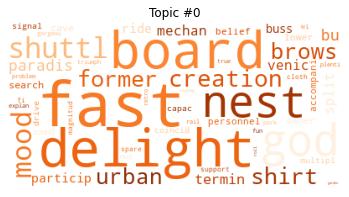

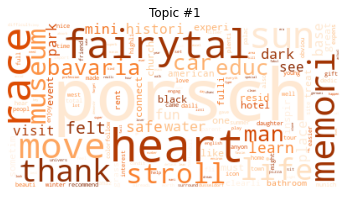

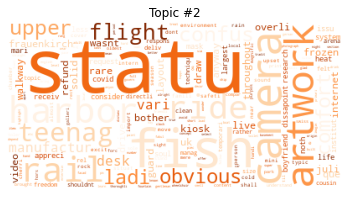

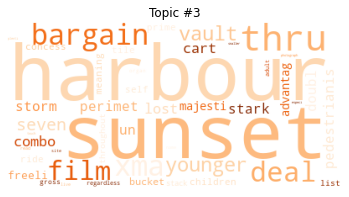

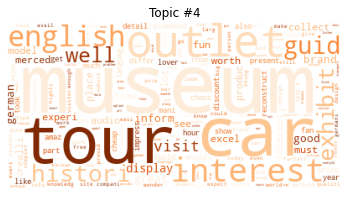

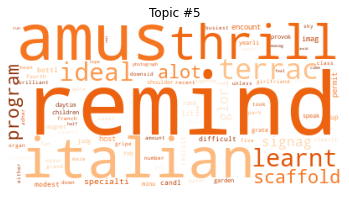

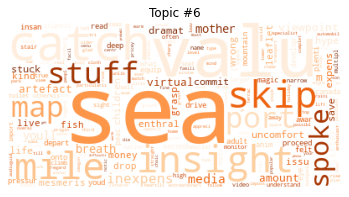

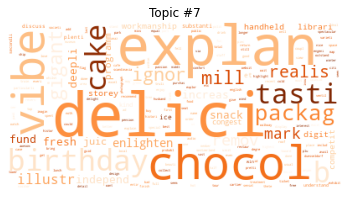

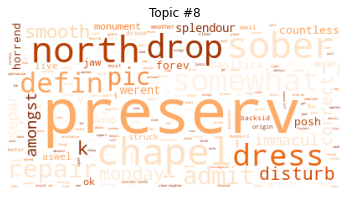

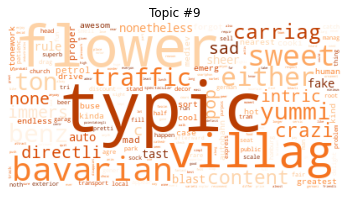

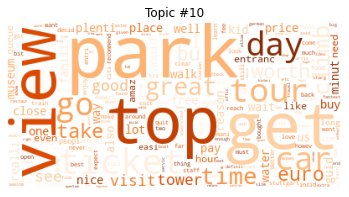

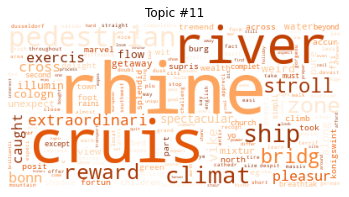

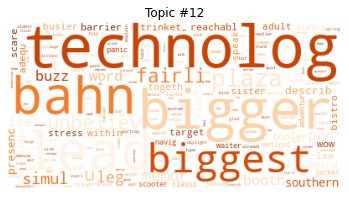

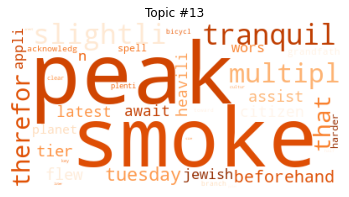

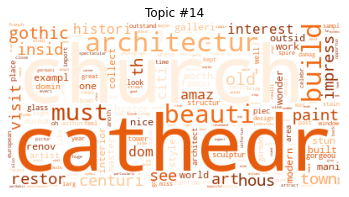

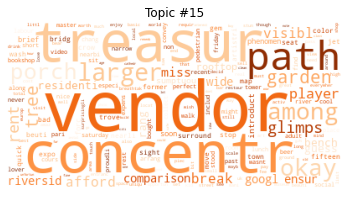

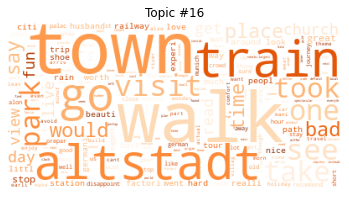

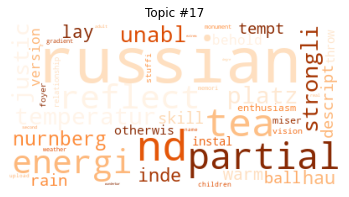

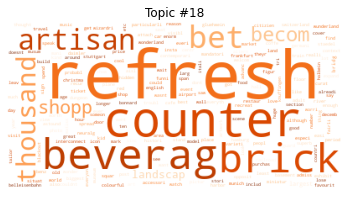

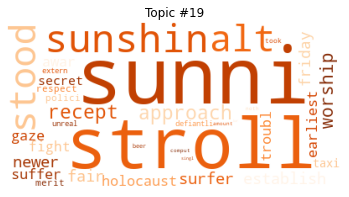

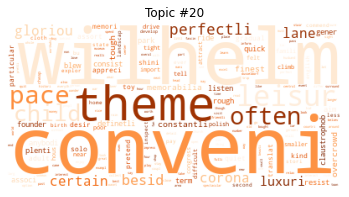

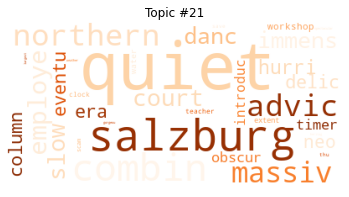

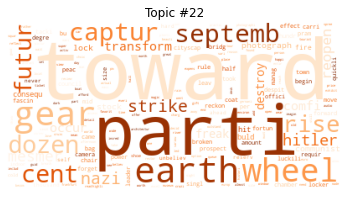

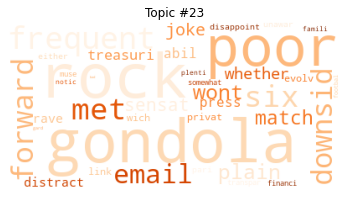

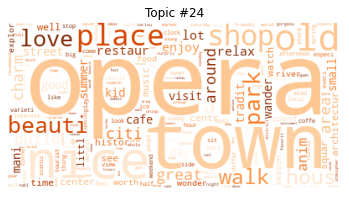

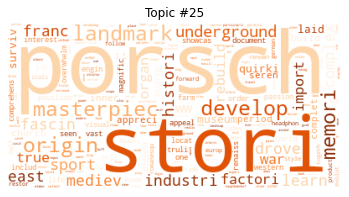

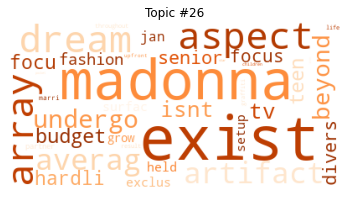

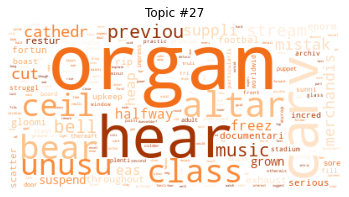

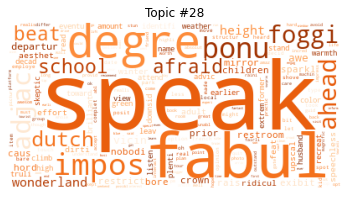

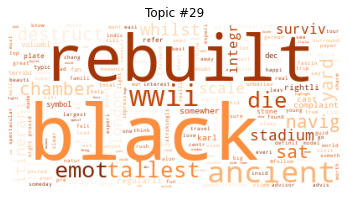

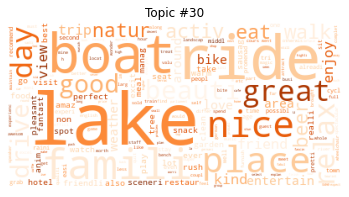

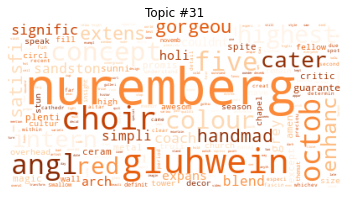

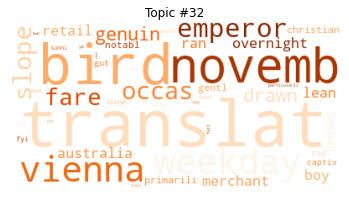

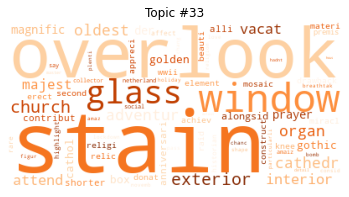

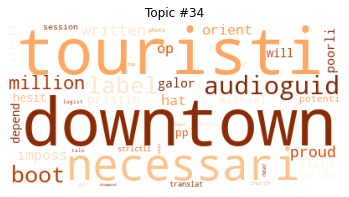

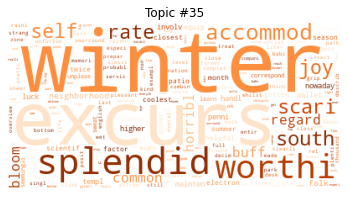

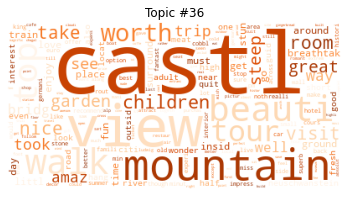

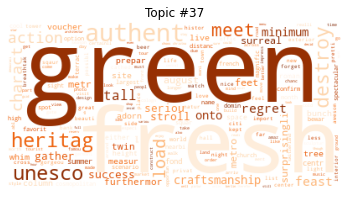

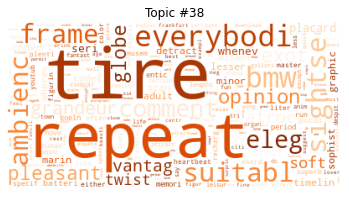

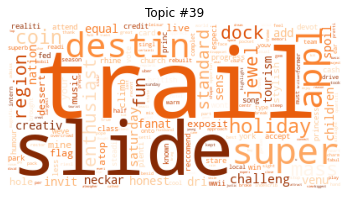

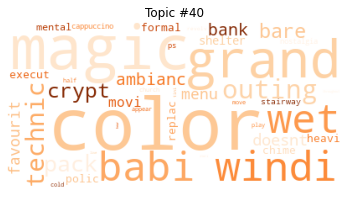

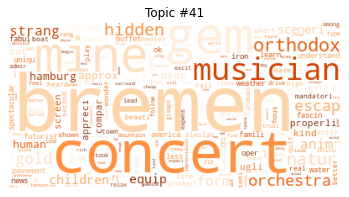

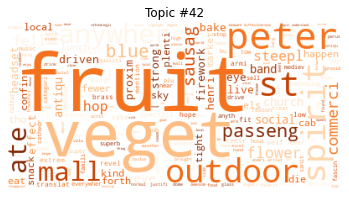

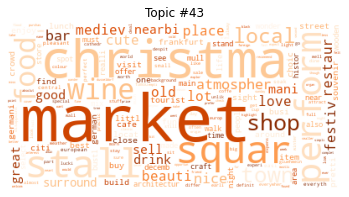

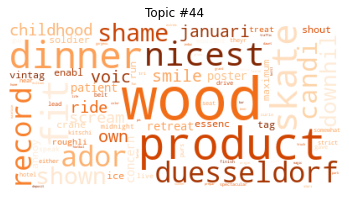

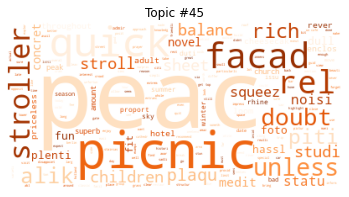

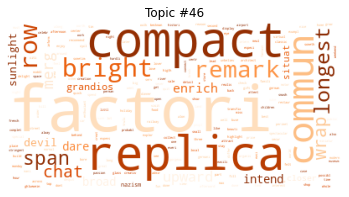

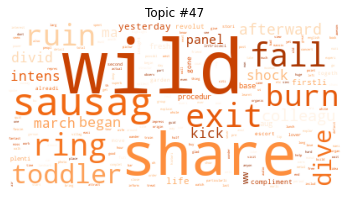

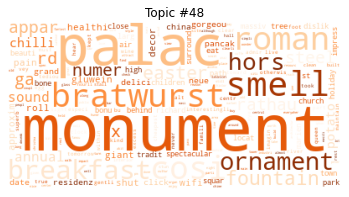

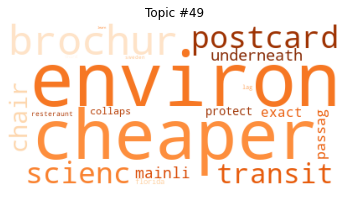

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(lda_model_tfidf.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', colormap='Oranges').fit_words(dict(lda_model_tfidf.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [25]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
cm = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: One of texts or corpus has to be provided.